In [3]:
import pickle
import string
import string as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split as split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier



## Data Importing and Cleaning 

In [125]:
df = pd.read_csv('spam.csv', encoding='latin1', usecols=[0, 1])

In [126]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Column Rename

In [127]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

## Removing Duplicate

In [128]:
df.duplicated().sum()

np.int64(403)

## Removing Duplicate and Null Value

In [129]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [130]:
df = df.drop_duplicates()

In [131]:
df.duplicated().sum()

np.int64(0)

## Label Encoding

In [132]:
encoder = LabelEncoder()

In [133]:
df['target'] = encoder.fit_transform(df['target'])

In [134]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA

In [135]:
df['character_count'] = df['text'].apply(len)

In [136]:
df['word_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [137]:
df['sent_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [138]:
df.head()

,target,text,character_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='character_count', ylabel='Count'>

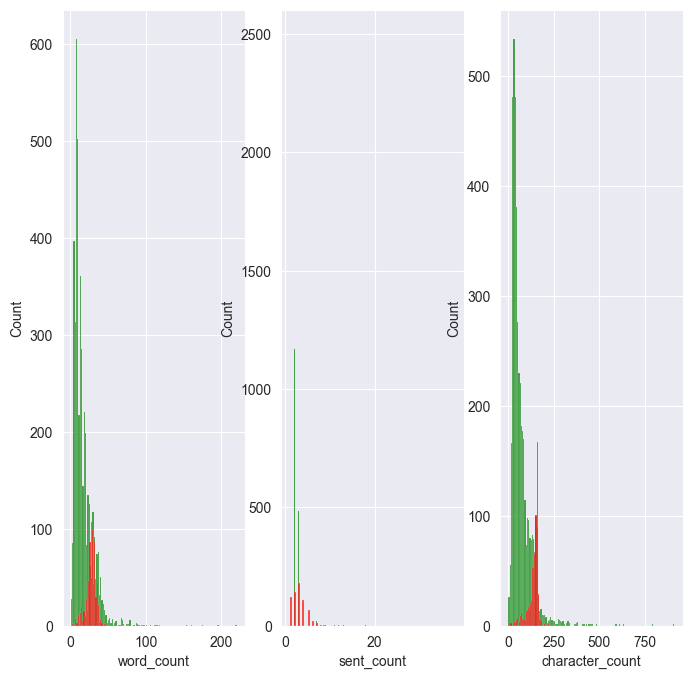

In [139]:
fig, axis =  plt.subplots(1, 3 ,figsize=(8, 8))

sns.histplot(df[df['target']==0]['word_count'], color = 'green', ax=axis[0])
sns.histplot(df[df['target']==1]['word_count'], color = 'red', ax=axis[0])

sns.histplot(df[df['target']==0]['sent_count'], color = 'green', ax=axis[1])
sns.histplot(df[df['target']==1]['sent_count'], color = 'red', ax=axis[1])

sns.histplot(df[df['target']==0]['character_count'], color = 'green', ax=axis[2])
sns.histplot(df[df['target']==1]['character_count'], color = 'red', ax=axis[2])

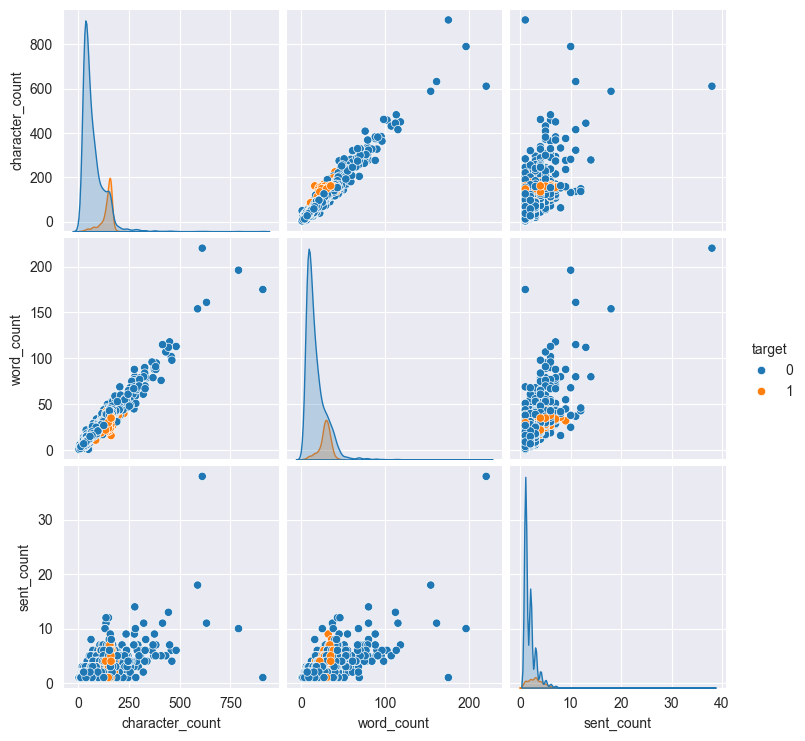

In [140]:
sns.pairplot(df, hue='target')

<Axes: >

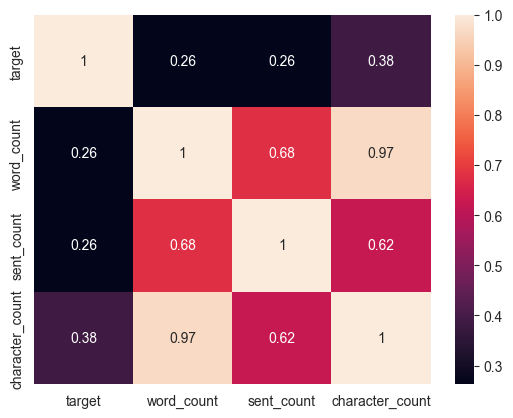

In [141]:
sns.heatmap(df[['target', 'word_count', 'sent_count', 'character_count']].corr(), annot=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   target           5169 non-null   int64 
 1   text             5169 non-null   object
 2   character_count  5169 non-null   int64 
 3   word_count       5169 non-null   int64 
 4   sent_count       5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


## Data Preprocessing
### Lower Case
### tokenize
### Removing special character
### Stemming


# Function to Perform Stem and removing Punctuation 

In [6]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
def stem(text):
    y = []
    for i in text:
        if i not in stop_words and i not in punctuations :
            y.append(ps.stem(i.lower()))
    return y

## Lower Case

In [144]:
df['transformed_text'] = df['text'].apply(lambda x: x.lower())

## Tokenize

In [145]:
df['transformed_text']=df['transformed_text'].apply(lambda x: nltk.word_tokenize(x))

## stemming

In [146]:
df['transformed_text'] = df['transformed_text'].apply(stem)  

In [147]:
df['new_text'] = df['transformed_text'].apply(lambda x: " ".join(x))

## Word Cloud

In [148]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [149]:
spam_wc = wc.generate(df[df['target'] == 1]['new_text'].str.cat(sep=" "))


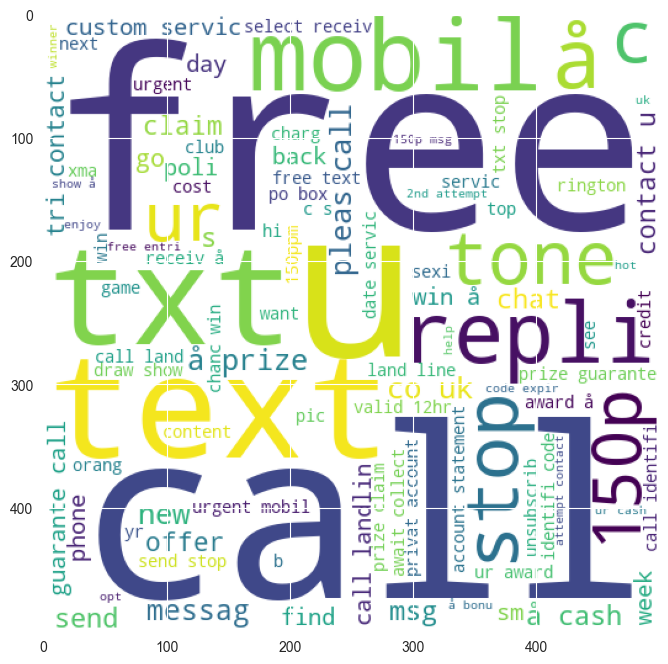

In [150]:
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)

In [151]:
ham_wc = wc.generate(df[df['target'] == 0]['new_text'].str.cat(sep=" "))


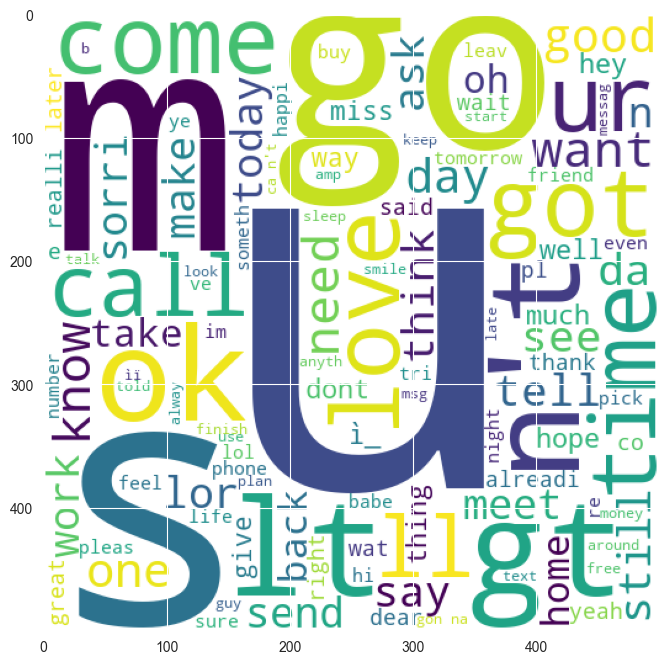

In [152]:
plt.figure(figsize=(8,8))
plt.imshow(ham_wc)

In [153]:
all_words = []
for message in df[df['target'] == 1]['transformed_text']:
    for word in message:
        all_words.append(word)

In [154]:
len(all_words) # 318194 39894 11083

11083

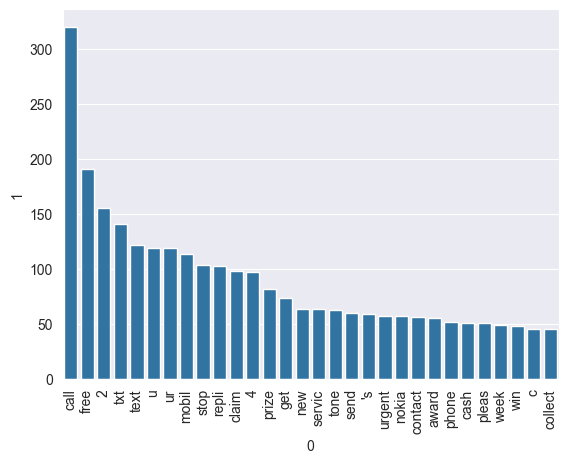

In [155]:
sns.barplot(x = pd.DataFrame(Counter(all_words).most_common(30))[0], y = pd.DataFrame(Counter(all_words).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

# Data Algorithm

## Vectorisation

In [156]:
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x))

In [157]:
count_vectorisation = CountVectorizer(max_features=3000,  stop_words='english')
tfidf_vectorisation = TfidfVectorizer(max_features=3000)

In [158]:
x = count_vectorisation.fit_transform(df['transformed_text']).toarray()

In [159]:
y = df['target'].values

In [160]:
y.shape

(5169,)

## Splitting

In [161]:
train_x, test_x, train_y, test_y = split(x, y, test_size = 0.2)

## Algorithm

In [162]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [163]:
gnb.fit(train_x, train_y)
y_pred1 = gnb.predict(test_x)
print("accuracy Score : ", accuracy_score(y_pred1, test_y))
print("confusion matrix : ", confusion_matrix(y_pred1, test_y))
print("precision : ", precision_score(y_pred1, test_y))

accuracy Score :  0.874274661508704
confusion matrix :  [[792  12]
 [118 112]]
precision :  0.9032258064516129


In [164]:
mnb.fit(train_x, train_y)
y_pred2 = mnb.predict(test_x)
print("accuracy Score : ", accuracy_score(y_pred2, test_y))
print("confusion matrix : ", confusion_matrix(y_pred2, test_y))
print("precision : ", precision_score(y_pred2, test_y))

accuracy Score :  0.988394584139265
confusion matrix :  [[905   7]
 [  5 117]]
precision :  0.9435483870967742


In [165]:
bnb.fit(train_x, train_y)
y_pred3 = bnb.predict(test_x)
print("accuracy Score : ", accuracy_score(y_pred3, test_y))
print("confusion matrix : ", confusion_matrix(y_pred3, test_y))
print("precision : ", precision_score(y_pred3, test_y))

accuracy Score :  0.9874274661508704
confusion matrix :  [[908  11]
 [  2 113]]
precision :  0.9112903225806451


In [166]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
mnb = MultinomialNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [167]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [168]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [169]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, train_x,train_y,test_x,test_y)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9439071566731141
Precision -  0.7796610169491526
For  KN
Accuracy -  0.9206963249516441
Precision -  1.0
For  NB
Accuracy -  0.988394584139265
Precision -  0.9590163934426229
For  DT
Accuracy -  0.9439071566731141
Precision -  0.9459459459459459
For  LR
Accuracy -  0.9806576402321083
Precision -  0.9727272727272728
For  RF
Accuracy -  0.9787234042553191
Precision -  0.9903846153846154


/Users/sadi_/Coding/SMS Spam Classifier/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9738878143133463
Precision -  0.944954128440367
For  BgC
Accuracy -  0.9700193423597679
Precision -  0.8842975206611571
For  ETC
Accuracy -  0.9835589941972921
Precision -  0.9908256880733946
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.987012987012987


In [170]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [171]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.920696,1.000000
8,ETC,0.983559,0.990826
5,RF,0.978723,0.990385
9,GBDT,0.952611,0.987013
4,LR,0.980658,0.972727
2,NB,0.988395,0.959016
3,DT,0.943907,0.945946
6,AdaBoost,0.973888,0.944954
7,BgC,0.970019,0.884298
0,SVC,0.943907,0.779661


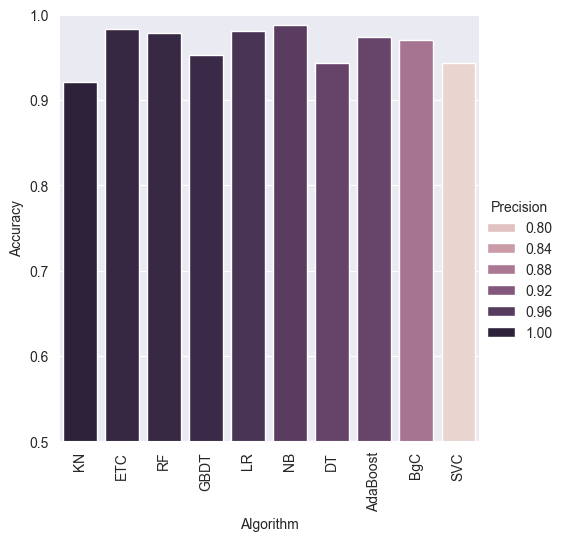

In [172]:
sns.catplot(x = 'Algorithm', y='Accuracy', 
               hue = 'Precision',data=performance_df, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [173]:
performance_df['OverAll'] = (performance_df['Precision']+performance_df['Accuracy'])/2

In [174]:
performance_df

,Algorithm,Accuracy,Precision,OverAll
1,KN,0.920696,1.000000,0.960348
8,ETC,0.983559,0.990826,0.987192
5,RF,0.978723,0.990385,0.984554
9,GBDT,0.952611,0.987013,0.969812
4,LR,0.980658,0.972727,0.976692
2,NB,0.988395,0.959016,0.973705
3,DT,0.943907,0.945946,0.944927
6,AdaBoost,0.973888,0.944954,0.959421
7,BgC,0.970019,0.884298,0.927158
0,SVC,0.943907,0.779661,0.861784


In [175]:
voting = VotingClassifier(estimators=[('LR',lrc),('ETC', etc), ('RF', rfc)], voting='soft')

In [176]:
voting.fit(train_x, train_y)
y_pred_voting = voting.predict(test_x)
print('Accuracy Score : ', accuracy_score(test_y, y_pred_voting))
print('Precision Score : ', precision_score(test_y, y_pred_voting))
print('overall', (accuracy_score(test_y, y_pred_voting) + precision_score(test_y, y_pred_voting))/2)

Accuracy Score :  0.9825918762088974
Precision Score :  0.9818181818181818
overall 0.9822050290135396


In [177]:
stacking = StackingClassifier(estimators=[('LR',lrc),('ETC', etc), ('RF', rfc)], final_estimator=knc)

In [178]:
stacking.fit(train_x, train_y)
y_pred_stacking = stacking.predict(test_x)
print('Accuracy Score : ', accuracy_score(test_y, y_pred_stacking))
print('Precision Score : ', precision_score(test_y, y_pred_stacking))

Accuracy Score :  0.9845261121856866
Precision Score :  0.95


# Model Deploying Functions

In [8]:
import re
def Transformation(text):
    lower = text.lower()
    new = re.sub(r'[^a-zA-Z0-9\s]', '', lower)
    tokenize = nltk.word_tokenize(new)
    stemming = stem(tokenize)
    
    return " ".join(stemming)

In [189]:
pickle.dump(count_vectorisation, open('count_vectorisation.pkl', 'wb'))
pickle.dump(etc, open('model.pkl', 'wb'))


In [9]:
Transformation('A [redacted] Loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.[redacted].co.uk to opt out reply stop')

'redact loan 950 approv receiv sm 1 min verif cash 1 hr wwwredactedcouk opt repli stop'